In [12]:
import pandas as pd

data = pd.read_csv("data.txt",sep="\t")

In [13]:
data.columns

Index(['Interaction ID', 'Entrez Gene Interactor A',
       'Entrez Gene Interactor B', 'BioGRID ID Interactor A',
       'BioGRID ID Interactor B', 'Systematic Name Interactor A',
       'Systematic Name Interactor B', 'Official Symbol Interactor A',
       'Official Symbol Interactor B', 'Synonyms Interactor A',
       'Synonyms Interactor B', 'Experimental System',
       'Experimental System Type', 'Author', 'Publication Source',
       'Organism ID Interactor A', 'Organism ID Interactor B', 'Throughput',
       'Score', 'Modification', 'Qualifications', 'Tags', 'Source Database',
       'SWISS-PROT Accessions Interactor A', 'TREMBL Accessions Interactor A',
       'REFSEQ Accessions Interactor A', 'SWISS-PROT Accessions Interactor B',
       'TREMBL Accessions Interactor B', 'REFSEQ Accessions Interactor B',
       'Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories',
       'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names',
       'Ontology Term Typ

In [78]:
data["Ontology Term IDs"].unique()

array(['-', 'APO:0000106|APO:0000147', 'APO:0000147|APO:0000106',
       'BTO:0000195', 'BTO:0000018|BTO:0000195', 'BTO:0000018',
       'BTO:0002181'], dtype=object)

# DATA Understanding
* **Interaction ID** : ID of th e
* Entrez Gene Interactor A/B : ID on *Entrez gene* database
* **BioGRID ID Interactor A/B** : IDEM
* Systematic Name Interactor A/B : It's just a name
* Official Symbol Interactor A/B : It's just a name
* Synonyms Interactor A/B : It's just a name
* Experimental System : The type of experiment used to detect the PPI
* Experimental System Type : Either ['physical', 'genetic']
* Author : The one that discover it
* Publication Source : Score of paper
* **Organism ID Interactor A/B** : organism from which the interactor in a given interaction originates. This identifier helps to specify the species or organism in which the interaction occurs, which is crucial for understanding the biological context and relevance of the interaction data.
* Throughput : Low or high or both , hroughput measures the efficiency or capacity of a system to process data or perform tasks within a given timeframe.
* **Score** : Interaction score
* **Modification** : biochemical changes or alterations that occur on proteins, which can influence their interactions with other proteins or biological processes
* Qualification : a field that provides additional information about the reliability, confidence, or quality of the reported protein-protein interactions
* Tags : It's full of -
* Source Database : fulle of "biogrid"
* SWISS-PROT Accessions Interactor A/B : the accession numbers from the SWISS-PROT database associated with the first interactor in a given protein-protein interaction.
* TREMBL Accessions Interactor A/B : IDEM
* **Ontology Term IDs** : Something related to tissue and biologie
* Ontology Term Names : Names
* **Ontology Term Categories** : ['-', 'phenotype|phenotype', 'phenotype']
* Ontology Term Qualifier IDs : ['-', '-|-']
* Ontology Term Qualifier Names : ['-', '-|-']
* Ontology Term Types : ['-', 'wild type|wild type', '-|-']
* Organism Name Interactor A/B : We can use the "Organism ID Interactor A/B"

In [79]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes
for _,protein in data.iterrows():
    G.add_node(protein['BioGRID ID Interactor A'], 
               symantic_name=protein['Systematic Name Interactor A'],
               official_name = protein["Official Symbol Interactor A"],
               organism=protein['Organism ID Interactor A'],
               organism_name=protein["Organism Name Interactor A"]
               )
    G.add_node(protein['BioGRID ID Interactor B'], 
            symantic_name=protein['Systematic Name Interactor B'],
            official_name = protein["Official Symbol Interactor B"],
            organism=protein['Organism ID Interactor B'],
            organism_name=protein["Organism Name Interactor B"]
            )

# Add edges with attributes
for _,protein in data.iterrows():
    G.add_edge(protein['BioGRID ID Interactor A'], protein['BioGRID ID Interactor B'],
               interaction_id=protein['Interaction ID'],
               experimental_system=protein['Experimental System'],
               experimental_system_type=protein['Experimental System Type'],
               score=protein["Score"],
               modification=protein["Modification"],
               ontology_id=protein["Ontology Term IDs"],
               ontology_name=protein["Ontology Term Names"]
               # Add other attributes as needed
               )
# Now you have a graph representation of your PPI dataset


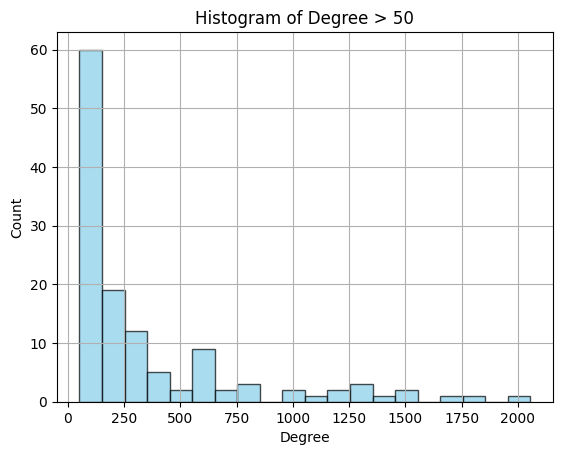

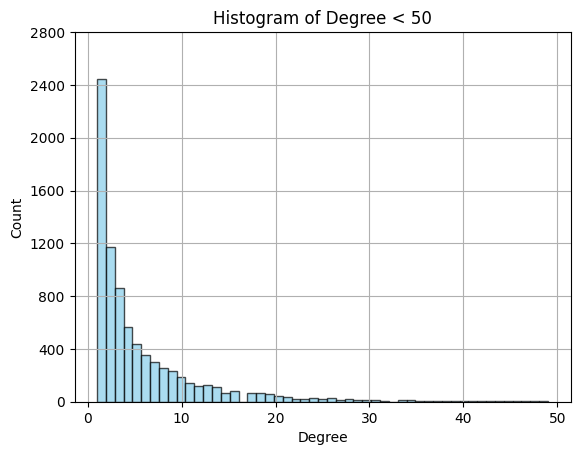

In [269]:
import matplotlib.pyplot as plt

plt.hist([e for e in list(dict(nx.degree(G)).values()) if e>50],bins=20,color='skyblue', edgecolor='black', alpha=0.7) #lli endhum degree sghir ktaaaaaaaaaaaaar (b7al matalan li endhum connexion w7da)
# Add title and labels
plt.title('Histogram of Degree > 50')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.grid(True)
plt.show()
plt.hist([e for e in list(dict(nx.degree(G)).values()) if e<50],bins=51,color='skyblue', edgecolor='black', alpha=0.7) #lli endhum degree sghir ktaaaaaaaaaaaaar (b7al matalan li endhum connexion w7da)
# Add title and labels
plt.title('Histogram of Degree < 50')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.yticks([i*400 for i in range(8)])  # Example custom ticks
plt.grid(True)
plt.show()

In [335]:
# Get nodes with degree higher than 50
high_degree_nodes = [node for node, degree in dict(G.degree()).items()]

# Create a subgraph containing only the high-degree nodes

subgraph = G.subgraph(high_degree_nodes)
nx.draw_spring(subgraph,node_size=10,width=0.01)
plt.figure(figsize=(100,100))